# 1. Set Environment

In [339]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [340]:
df_clean=pd.read_csv('Clean_Data_Without_Segment_Label.csv').drop('Unnamed: 0',axis=1)
df_seg=pd.read_csv('Cluster_Variable_normalized_clean.csv').drop('Unnamed: 0',axis=1)

In [341]:
idx=[]
for i in df_seg.columns:
    idx.append(np.where(df_clean.columns==i))

In [342]:
print(df_clean.shape,"\n",df_seg.shape)

(4874, 41) 
 (4874, 17)


In [343]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 41 columns):
customer_id            4853 non-null float64
spend_per_txn          4853 non-null float64
spend_per_item         4853 non-null float64
jan                    4853 non-null float64
feb                    4853 non-null float64
mar                    4853 non-null float64
apr                    4853 non-null float64
may                    4853 non-null float64
jun                    4853 non-null float64
jul                    4853 non-null float64
sep                    4853 non-null float64
oct                    4853 non-null float64
nov                    4853 non-null float64
dec                    4853 non-null float64
total_spend            4853 non-null float64
mens_dept_spend        4853 non-null float64
womens_dept_spend      4853 non-null float64
kids_dept_spend        4853 non-null float64
athletic_dept_spend    4853 non-null float64
accessories_spend      4853 non-null f

In [344]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 17 columns):
jan                  4874 non-null float64
feb                  4874 non-null float64
mar                  4874 non-null float64
apr                  4874 non-null float64
may                  4874 non-null float64
jun                  4874 non-null float64
jul                  4874 non-null float64
sep                  4874 non-null float64
oct                  4874 non-null float64
nov                  4874 non-null float64
dec                  4874 non-null float64
mens_dept_spend      4874 non-null float64
womens_dept_spend    4874 non-null float64
kids_dept_spend      4874 non-null float64
accessories_spend    4874 non-null float64
response             4874 non-null float64
clicks               4874 non-null float64
dtypes: float64(17)
memory usage: 647.4 KB


In [345]:
df_clean.head()

,customer_id,spend_per_txn,spend_per_item,jan,feb,mar,apr,may,jun,jul,...,cmpns,pct_response,ever_responded,opens,clicks,hhincome,hhage,hhwom,hhmen,hhkids
0,1115.0,43.21,33.60,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,23.0,0.521739,1.0,0.047,0.005,101361.0,50.3,2.00,1.87,2.64
1,22535.0,42.32,18.14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.000000,0.0,0.057,0.009,84150.0,30.2,1.20,0.78,2.00
2,76737.0,39.59,32.99,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,10.0,0.500000,1.0,0.059,0.007,94670.0,40.0,1.97,0.86,1.41
3,82516.0,29.99,29.99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.000000,0.0,0.059,0.009,75347.0,30.3,1.35,0.85,1.80
4,102181.0,46.66,23.33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.100000,1.0,0.060,0.007,65825.0,36.7,1.97,0.74,1.57


In [346]:
df_seg.head()

,jan,feb,mar,apr,may,jun,jul,sep,oct,nov,dec,mens_dept_spend,womens_dept_spend,kids_dept_spend,accessories_spend,response,clicks
0,2.506721,-0.413040,-0.455148,2.277819,2.124702,-0.424766,-0.436688,-0.447222,-0.365582,-0.299952,2.887851,-0.422845,-0.658196,-0.351757,1.801014,5.442249,-1.815173
1,-0.398849,2.420594,-0.455148,-0.438930,-0.470561,-0.424766,-0.436688,-0.447222,2.734823,-0.299952,-0.346210,-0.422845,-0.080674,-0.351757,4.249591,-0.499551,0.079913
2,2.506721,-0.413040,-0.455148,2.277819,2.124702,-0.424766,-0.436688,2.235582,-0.365582,-0.299952,-0.346210,-0.422845,1.940942,-0.351757,0.257267,1.976199,-0.867630
3,-0.398849,-0.413040,2.196653,-0.438930,-0.470561,-0.424766,-0.436688,-0.447222,-0.365582,-0.299952,-0.346210,-0.422845,-0.658196,1.309433,-0.467868,-0.499551,0.079913
4,-0.398849,2.420594,-0.455148,-0.438930,-0.470561,-0.424766,-0.436688,-0.447222,-0.365582,3.333203,-0.346210,-0.422845,-0.658196,-0.351757,-0.467868,-0.004401,-0.867630


In [347]:
#Null Check
df_seg.isnull().sum()

jan                  0
feb                  0
mar                  0
apr                  0
may                  0
jun                  0
jul                  0
sep                  0
oct                  0
nov                  0
dec                  0
mens_dept_spend      0
womens_dept_spend    0
kids_dept_spend      0
accessories_spend    0
response             0
clicks               0
dtype: int64

# K-mean

In [348]:
from sklearn.cluster import KMeans

In [349]:
#df['Gender'].factorize()
#type(df['Gender'].factorize())
#type(df['Gender'].factorize()[0])

### Elbow plot

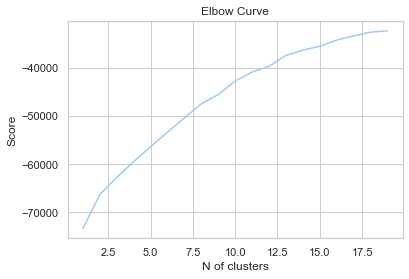

In [350]:
#y=df[['Spending Score (1-100)']].values
#x=df[['Annual Income (k$)']].values
#### Kmeans needs 2d array, so here use 2 brackets!


Nc=range(1,20)
kmeans=[KMeans(n_clusters=i) for i in Nc ]
#### Create a Kmean machine with n_group
#### python 的邏輯都是“物件”, 因此都需要先創建“機器”
kmeans
score = [kmeans[i].fit(df_seg).score(df_seg) for i in range(len(kmeans))]
#### Opposite of the value of y on the K-means objective.
#### score 就是 內部距離 加負號！！！
score

plt.plot(Nc,score)
plt.xlabel('N of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

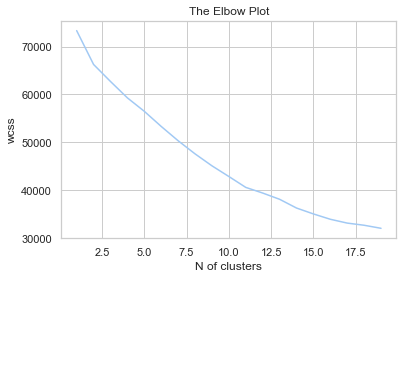

In [351]:
#within-cluster sum of square
#kmeans.inertia_ = wcss
wcss = []

for i in range(1,20):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_seg)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)

plt.title('The Elbow Plot')
plt.xlabel('N of clusters')
plt.ylabel('wcss')
# Annotate arrow
plt.annotate('Possible Elbow Point', xy=(4,10), xytext=(7.5,1.5), xycoords='data', 
             arrowprops=dict(arrowstyle = '->', connectionstyle = 'arc3', color='blue',lw=2))
plt.show()

##### see: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### fit and predict
For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"

In [352]:
KMeans()

km = KMeans(n_clusters= 4, init='k-means++', random_state=0)
#### init:  Method for initialization
#### random_state, set a seed to make sure every time we run the model, we choose the same centeroid
clusters= km.fit_predict(df_seg)

#### fit_predict(x) equals to fit(x).predict(x)
#### predict(): Predict the closest cluster each sample in X belongs to.
#### fit(obj) the obj can only contain 'Numerical'
df_l=df_clean
df_l['label']=clusters


In [353]:
df_l.columns

Index(['customer_id', 'spend_per_txn', 'spend_per_item', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'sep', 'oct', 'nov', 'dec', 'total_spend',
       'mens_dept_spend', 'womens_dept_spend', 'kids_dept_spend',
       'athletic_dept_spend', 'accessories_spend', 'recency', 'response',
       'total_txns', 'total_items', 'unique_sizes', 'unique_depts',
       'internet_spend', 'aug', 'tenure', 'retained_flag', 'retained_spend',
       'cmpns', 'pct_response', 'ever_responded', 'opens', 'clicks',
       'hhincome', 'hhage', 'hhwom', 'hhmen', 'hhkids', 'label'],
      dtype='object')

### 2d scatterplot

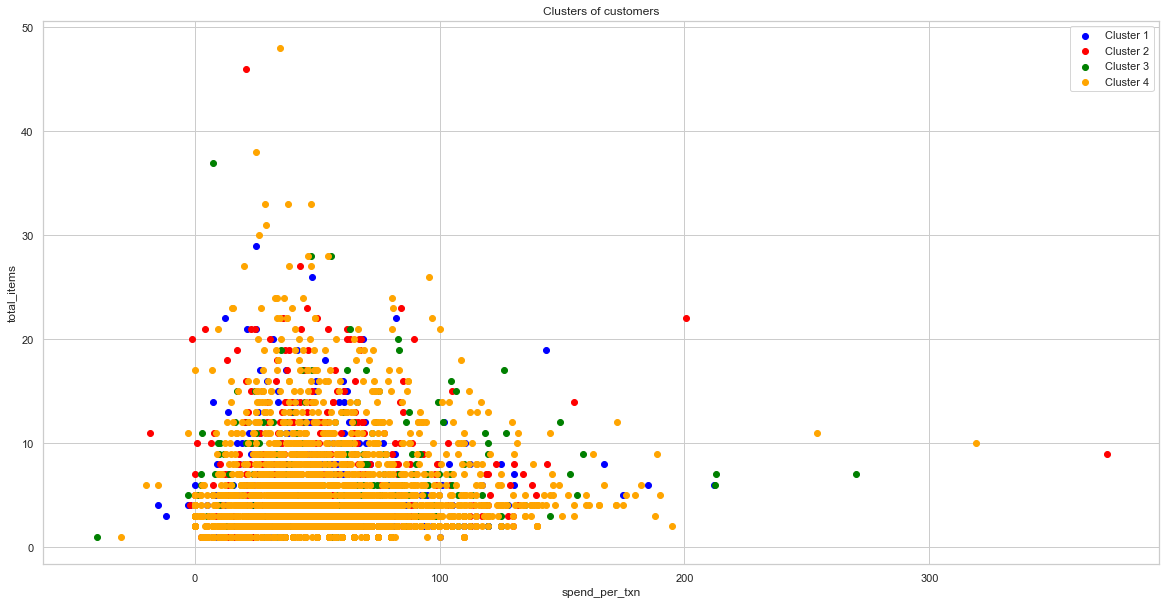

In [354]:
color=['blue','red','green', 'orange']

fig= plt.figure(figsize=(20,10))

for i in range(4):
    plt.scatter(df_l['spend_per_txn'][df_l.label==i], df_l['total_items'][df_l.label==i], c=color[i], label = 'Cluster {}'.format(i+1))

plt.title('Clusters of customers')
plt.xlabel('spend_per_txn')
plt.ylabel('total_items')
plt.legend()
plt.show()

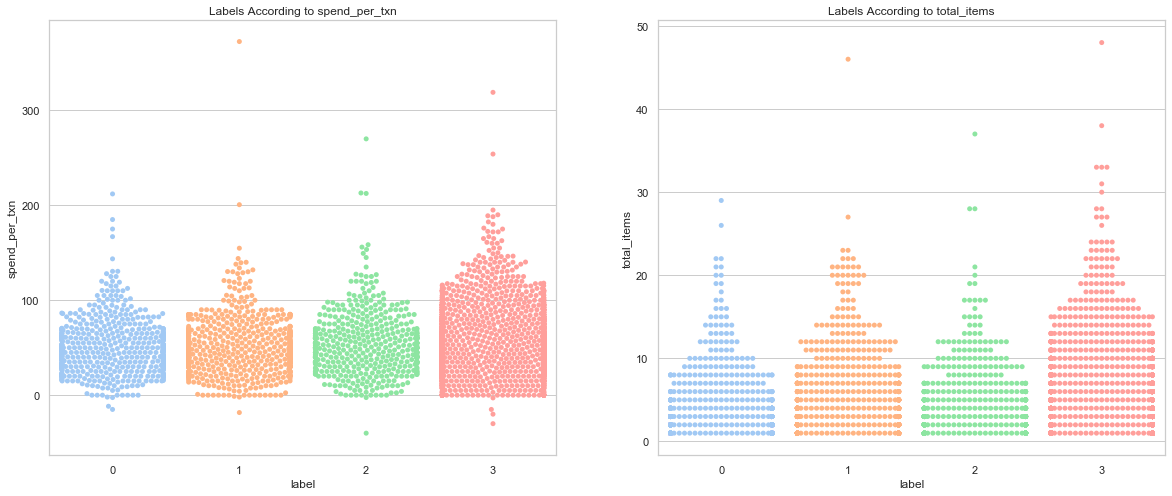

In [355]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.swarmplot(x='label',y='spend_per_txn' ,data=df_l, ax=ax[0])
#### swarmplot : Draw a categorical scatterplot with non-overlapping points.
ax[0].set_title('Labels According to spend_per_txn')

sns.swarmplot(x='label', y='total_items', data=df_l, ax=ax[1])
ax[1].set_title('Labels According to total_items')
plt.show()

### 3d scatterplot

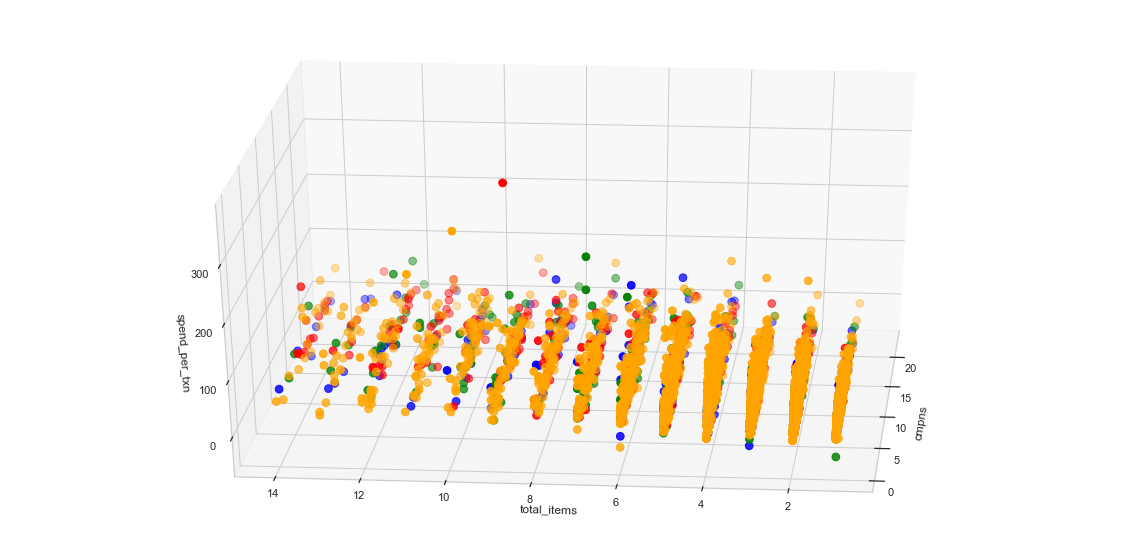

In [356]:

from mpl_toolkits.mplot3d import Axes3D

color=['blue','red','green', 'orange']

fig = plt.figure(figsize= (20,10))
ax= fig.add_subplot(111, projection='3d')
#### 3d 圖的邏輯是先將畫布設定為3d
for i in range(4):
    ax.scatter(df_l.loc[df_l.total_items<15,'cmpns'][df_l.label==i], df_l.loc[df_l.total_items<15,'total_items'][df_l.label==i], df_l.loc[df_l.total_items<15,'spend_per_txn'][df_l.label==i], c=color[i], s=60)

ax.view_init(30,185)
#### 觀看角度
plt.xlabel("cmpns")
plt.ylabel("total_items")
ax.set_zlabel('spend_per_txn')
plt.show()

Index(['Unnamed: 0', 'customer_id', 'spend_per_txn', 'spend_per_item', 'jan',
       'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'sep', 'oct', 'nov', 'dec',
       'total_spend', 'mens_dept_spend', 'womens_dept_spend',
       'kids_dept_spend', 'athletic_dept_spend', 'accessories_spend',
       'recency', 'response', 'total_txns', 'total_items', 'unique_sizes',
       'unique_depts', 'internet_spend', 'aug', 'tenure', 'retained_flag',
       'retained_spend', 'cmpns', 'pct_response', 'ever_responded', 'opens',
       'clicks', 'hhincome', 'hhage', 'hhwom', 'hhmen', 'hhkids', 'label'],
      dtype='object')

# Hierachical Cluster with TSNE

In [160]:
from sklearn.manifold import TSNE
tsn= TSNE()
res_tsne = tsn.fit_transform(df_seg)

from sklearn.cluster import AgglomerativeClustering as AggClus
clus_mod = AggClus(n_clusters= 5, linkage='ward')
#### create model
assign = clus_mod.fit_predict(df_seg)
#### fit and predict, thus assign is the label dervied from Hierarchical model with ward method!
## or use assign= clus_mod.fit(df_d).labels_

##### TSNE exlaination:
    TSNE: a dimensionality reduction method, like PCA, we can use it when have small sample with many dimension (Variables)
    but NOT like PCA focusing on the Varianbility of data, TSNE focuses on the smilatrity.
    Thus, TSNE is good at clustering.
        
        
Refference: 

http://bit.ly/2N6tUof

http://bit.ly/2N0JLV1

https://distill.pub/2016/misread-tsne/
        


#### Difference between fit, transfrom, fit_transform: 
https://blog.csdn.net/weixin_38278334/article/details/82971752

#### Agglomerative Explaination:
Agglomerative is a clustering mathod building a tree, the logic is that 
we decide how many clusters (leaf) we want to have and 
the algorithm uses the dmin, dmax or davg to create the the assigned number of clusters.
    
The Agglomerative Clustering class will require two inputs:

- n_clusters: The number of clusters to form as well as the number of centroids to generate.
- linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. Value will be: 'complete' <br>
    
Note: It is recommended that try everything with 'average' as well

Refference: https://blog.csdn.net/Haiyang_Duan/article/details/77995665

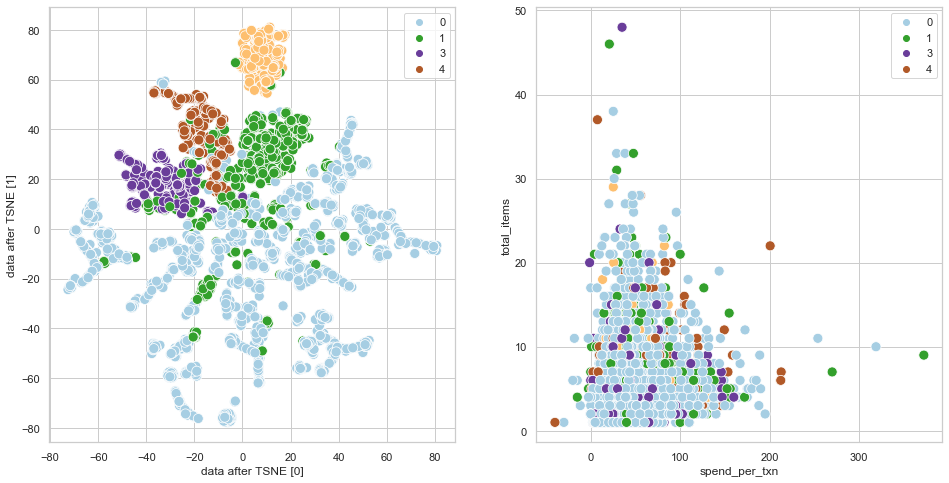

<Figure size 576x576 with 0 Axes>

In [227]:
##use two clustering methods, TSNE and Agglomerativ, to check the data

f,ax = plt.subplots(1,2,figsize=(16,8))
sns.set(style= 'whitegrid', palette= 'pastel')
cmap= sns.cubehelix_palette(dark = .5, light= .5, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0], y=res_tsne[:,1], s=100, hue=assign, palette='Paired', ax=ax[0])
####x,y is the value after data being TSNE, color is the label that hierarchical model predict
ax[0].set_xlabel('data after TSNE [0]')
ax[0].set_ylabel('data after TSNE [1]')

plt.figure(figsize=(8,8))
sns.scatterplot(data=df_clean, x= df_clean['spend_per_txn'], y= df_clean['total_items'],
                hue=assign, palette= 'Paired', s=100, ax=ax[1])
#### x,y is the original value of Spending and Income, color is the label that hierarchical model predict


plt.show()

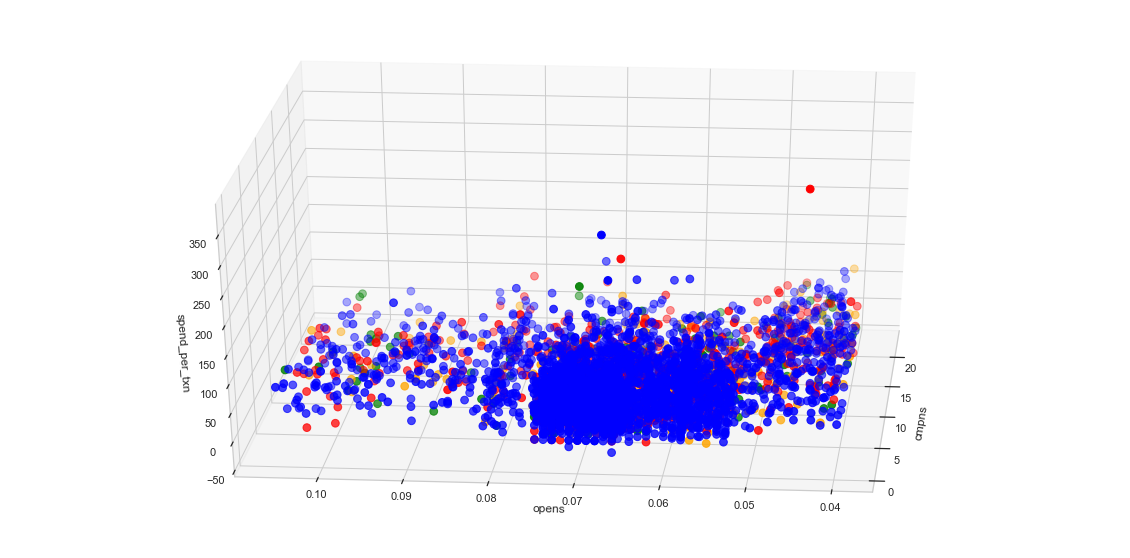

In [247]:
color=['blue','red','green', 'orange']

fig = plt.figure(figsize= (20,10))
ax= fig.add_subplot(111, projection='3d')
#### 3d 圖的邏輯是先將畫布設定為3d
for i in range(4):
    ax.scatter(df_clean['cmpns'][assign==i], df_clean['opens'][assign==i], df_clean['spend_per_txn'][assign==i], c=color[i], s=60)

ax.view_init(30,185)
#### 觀看角度
plt.xlabel("cmpns")
plt.ylabel("opens")
ax.set_zlabel('spend_per_txn')
plt.show()

In [242]:
for i in collections.Counter(assign).values():
    print(i/len(df_clean))


0.14567090685268774
0.6231021748050882
0.062782109150595
0.08329913828477636
0.08514567090685268


#### Hierarchy, ward linkage explaination

http://mirlab.org/jang/books/dcpr/dcHierClustering.asp?title=3-2%20Hierarchical%20Clustering%20(%B6%A5%BCh%A6%A1%A4%C0%B8s%AAk)&language=chinese

# Density Based Clustering (DBSCAN)
Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this part, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points<br>
- Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
- minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

#### 理解： 在多維平面上畫一個點，指定Epsilon(圓周), minimumSamples(密度)，看看有多少observation符合這個設定，就是同一個cluster
refference: https://zh.wikipedia.org/wiki/DBSCAN

In [168]:
cluster = [DBSCAN(eps= i, min_samples= 10).fit(df_seg).labels_ for i in range(2,1000,10)]
for i in range(len(cluster)):
    print(len(set(cluster[i])))

39
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


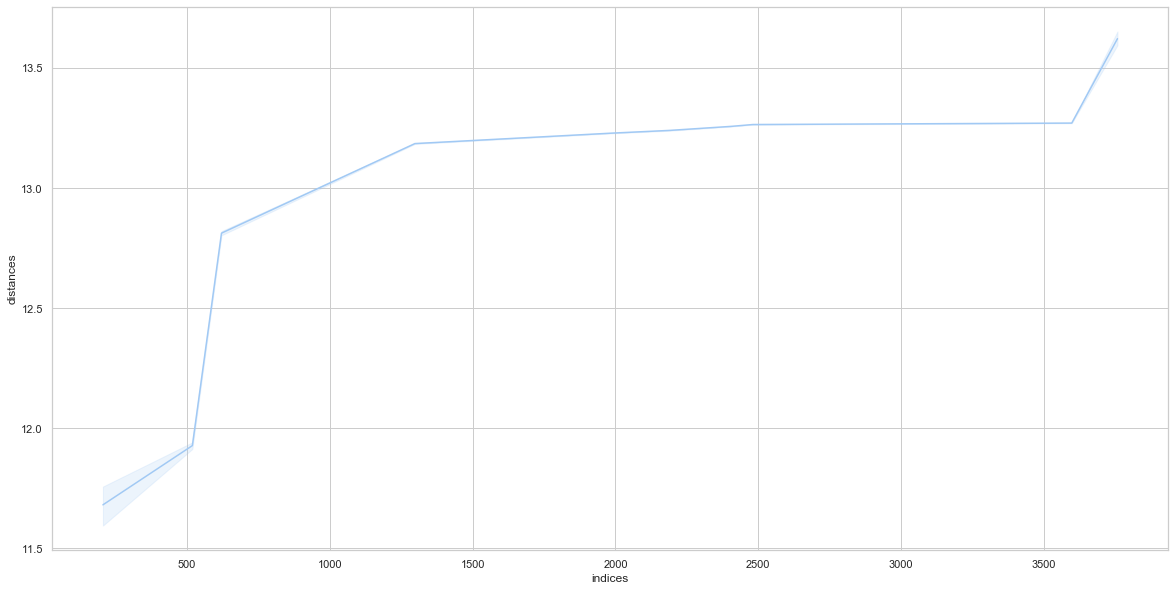

In [279]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=len(df_seg)).fit(df_seg)
distances, indices = nbrs.kneighbors(df_seg)

indices=sorted(indices[:,-1], reverse=True)
distances=sorted(distances[:,-1], reverse=True)

plt.figure(figsize=(20,10))
sns.lineplot(indices,distances)
plt.xlabel('indices')
plt.ylabel('distances')
plt.show()

In [310]:
#!pip3 install pyclustering
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
# Read sample for clustering from some file.
sample = np.asanyarray(df_seg)
# Run cluster analysis where connectivity radius is bigger than real.
radius = 0.1
neighbors = 3
optics_instance = optics(sample, radius, neighbors)
# Performs cluster analysis.
optics_instance.process()
# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()
# Visualize clustering results.
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, sample)
visualizer.show()
# Display ordering.
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, 2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [309]:
cluster

[array([-1, -1, -1, ...,  9,  7,  1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 arr

In [301]:
sample = read_sample(FCPS_SAMPLES.SAMPLE_CHAINLINK)
sample = np.asanyarray(sample)
df_seg.mean(axis=0)

jan                 -0.018514
feb                 -0.018866
mar                 -0.026964
apr                 -0.026456
may                 -0.024883
jun                 -0.027995
jul                 -0.016627
sep                 -0.022289
oct                 -0.025899
nov                 -0.067383
dec                 -0.029041
mens_dept_spend     -0.035537
womens_dept_spend   -0.060311
kids_dept_spend     -0.050587
accessories_spend   -0.053370
response            -0.098372
clicks               0.038116
dtype: float64

In [303]:
sample = np.asanyarray(df_seg)
radius = 0.15
neighbors = 45
optics_instance = optics(sample, radius, neighbors)
optics_instance.process()

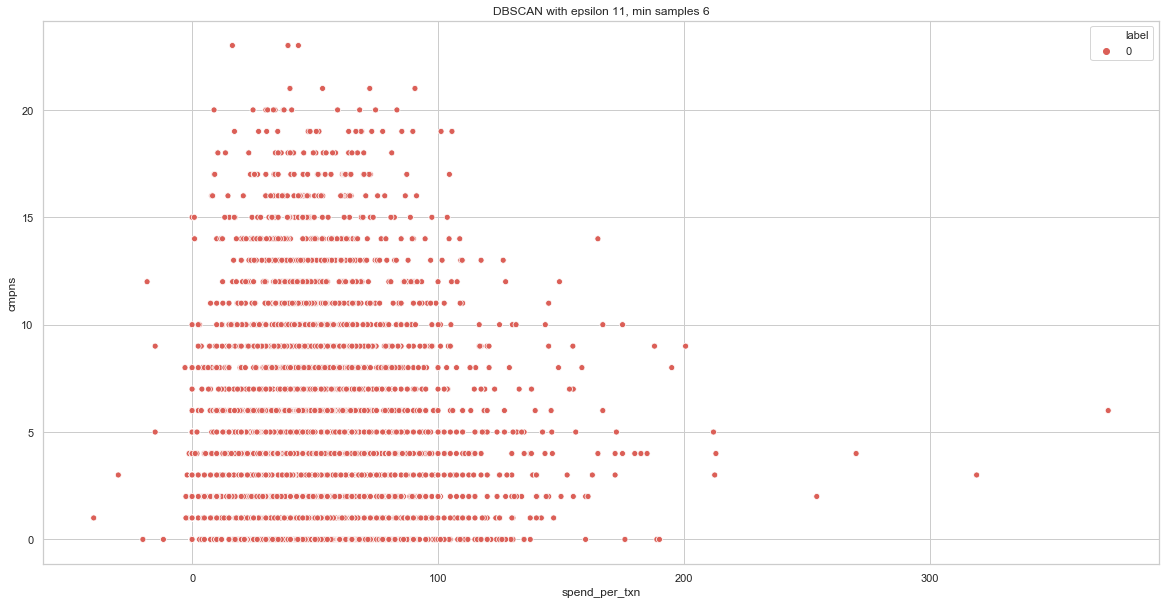

In [280]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(20,10))

db= DBSCAN(eps= 12.7, min_samples= 500).fit(df_seg)

df_l_DBSCAN = df_clean
df_l_DBSCAN['label']= db.labels_

sns.scatterplot(df_l_DBSCAN['spend_per_txn'], df_l_DBSCAN['cmpns'], hue=df_l_DBSCAN['label'],
                palette= sns.color_palette('hls',np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

In [201]:
collections.Counter(db.labels_)

Counter({-1: 3836, 0: 393, 1: 337, 2: 308})

#### Interpretation
The model did not work well <br>
The Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.

# Mean Shift Algorithm
MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

refference: https://www.youtube.com/watch?v=Evc53OaDTFc

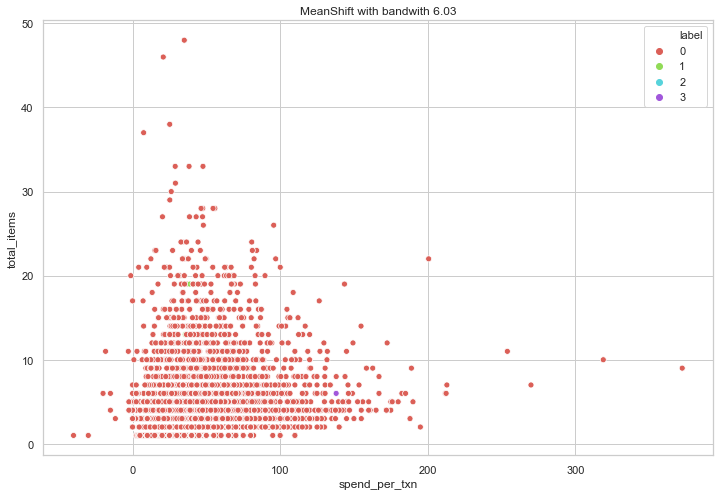

In [167]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(df_seg, quantile= 0.5)
#### let algorithm help us to find a good bandwidth
ms=MeanShift(bandwidth).fit(df_seg)

df_l_ms = df_clean
df_l_ms['label']= ms.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(df_l_ms['spend_per_txn'], df_l_ms['total_items'], hue= df_l_ms.label, 
               palette= sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.title('MeanShift with bandwith {}'.format(round(bandwidth,2)))
plt.show()

In [173]:
import collections
collections.Counter(ms.labels_)

Counter({0: 4849, 1: 14, 2: 5, 3: 6})

# Wrap Up All in One Place
Let's visualize all the algorithms we used so far and see their clustering distributions.

<Figure size 432x288 with 0 Axes>

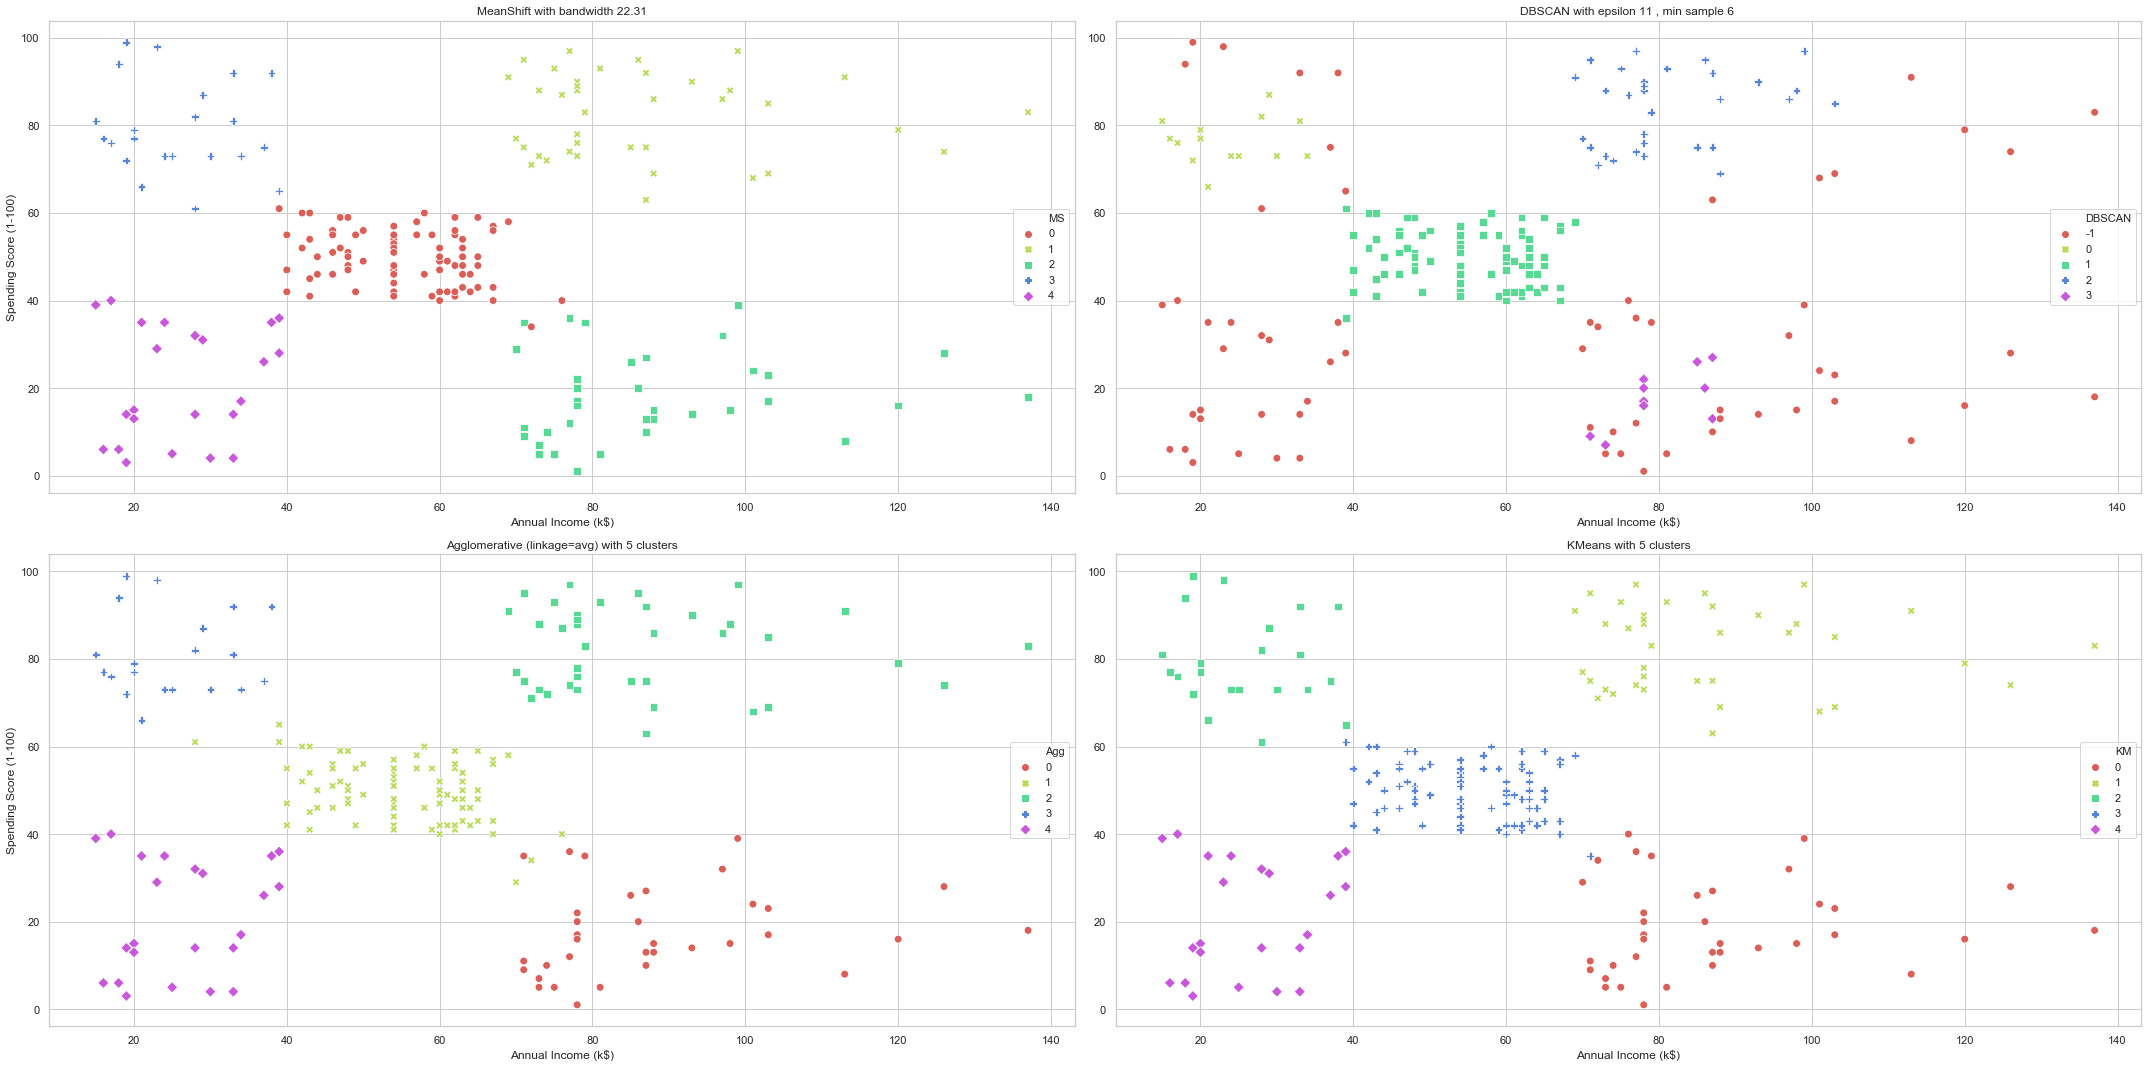

In [57]:
plt.clf()
fig= plt.figure(figsize=(30,15))
algorithms= ['KMeans', 'Agglomerative (linkage=avg)', 'DBSCAN', 'MeanShift']
DBSCAN_Parm=(11,6)
bandwidth = estimate_bandwidth(df_d, quantile=0.1)

df_wrap=df_clean
####fit_predict(df)= fit(df).label_
df_wrap['KM']= KMeans(n_clusters=5).fit_predict(df_seg)
df_wrap['Agg']= AggClus(n_clusters=5, linkage='average').fit_predict(df_seg)
df_wrap['DBSCAN']= DBSCAN(eps=DBSCAN_Parm[0], min_samples=DBSCAN_Parm[1]).fit_predict(df_seg)
df_wrap['MS']= MeanShift(estimate_bandwidth(df_seg, quantile=0.1)).fit_predict(df_seg)



for i in (1,2,3,4):
    ax= fig.add_subplot(i+220)
    sns.scatterplot(df_wrap[''], df_wrap['Spending Score (1-100)'],
                    hue=df_wrap.iloc[:,-i],style= df_wrap.iloc[:,-i],
                    palette= sns.color_palette('hls',np.unique(df_wrap.iloc[:,-i]).shape[0]),s=60, ax=ax)
    if df_wrap.columns[-i] =='DBSCAN' :
        ax.set_title('DBSCAN with epsilon {} , min sample {} '.format(DBSCAN_Parm[0],DBSCAN_Parm[1]))
    elif df_wrap.columns[-i]=='MS':
        ax.set_title('MeanShift with bandwidth {}'.format(round(bandwidth,2)))
    else:
        ax.set_title('{} with {} clusters'.format(algorithms[-i], np.unique(df_wrap.iloc[:,-i]).shape[0]))
    plt.ylabel('Spending Score (1-100)' if i%2 !=0 else"")

plt.tight_layout()
plt.show()

In [139]:
df_seg.shape

(4874, 18)

# Affinity Propogation

In [315]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

display(X)

array([[ 1.47504421,  0.9243214 ],
       [-0.02204385, -0.80495334],
       [-1.17671587, -1.80823709],
       [ 0.77223375,  1.00873958],
       [ 1.23283122,  0.23187816],
       [-0.92174673, -0.88390948],
       [ 1.65956844, -1.44120941],
       [ 0.33389417, -1.98431234],
       [-1.27143074, -0.79197498],
       [ 1.33614738,  1.20373092],
       [ 1.47123406, -1.13379737],
       [ 0.94839057,  1.20529925],
       [ 0.65271607,  0.92518273],
       [-0.11980203, -0.79925047],
       [ 1.26163833,  0.91422683],
       [ 0.87899009, -0.24086941],
       [ 0.74124048, -1.48941493],
       [ 0.71534397, -0.86504782],
       [ 0.80238551, -1.57971026],
       [ 0.51444771, -0.8425914 ],
       [ 1.38051886,  1.06083751],
       [ 0.42626567,  0.78108998],
       [ 0.74517391,  0.78096285],
       [ 0.78242322,  1.92463186],
       [ 0.76657723, -1.70845306],
       [ 0.82604393,  1.07817448],
       [ 1.1854125 , -0.9289691 ],
       [-1.15450648, -1.8380019 ],
       [ 1.4002824 ,

In [326]:
n_clusters_

12

In [327]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs


# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-2000).fit(df_seg)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)


# #############################################################################

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

In [316]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels ==
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 300 but corresponding boolean dimension is 4874

<Figure size 432x288 with 0 Axes>

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


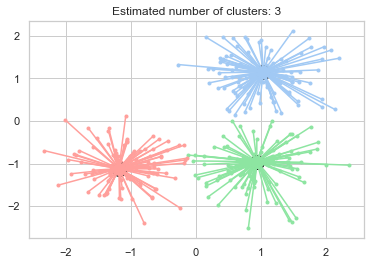

In [317]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()